In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import sqlalchemy
from sqlalchemy.orm import Session
from sqlalchemy.ext.automap import automap_base
from sqlalchemy import create_engine, inspect, func

from flask import Flask,jsonify

from datetime import datetime as dt

In [2]:
hawaii_input="hawaii.sqlite"

# INSPECTION

In [3]:
Base=automap_base()
engine=create_engine(f"sqlite:///{hawaii_input}")
Base.prepare(engine,reflect=True)
Base.classes.keys()

['measurement', 'station']

In [4]:
Mmt=Base.classes.measurement
Stn=Base.classes.station
session=Session(engine)

## Measurement class

In [5]:
inspector=inspect(engine)
inspector.get_table_names()
columns=inspector.get_columns("measurement")
for c in columns:
    print(c["name"],c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [6]:
engine.execute("SELECT * FROM measurement ORDER BY date DESC LIMIT 5").fetchall()

[(2724, 'USC00519397', '2017-08-23', 0.0, 81.0),
 (7635, 'USC00514830', '2017-08-23', 0.0, 82.0),
 (12187, 'USC00519523', '2017-08-23', 0.08, 82.0),
 (19550, 'USC00516128', '2017-08-23', 0.45, 76.0),
 (2723, 'USC00519397', '2017-08-22', 0.0, 82.0)]

In [7]:
engine.execute("SELECT * FROM measurement ORDER BY date ASC LIMIT 5").fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2725, 'USC00513117', '2010-01-01', 0.28, 67.0),
 (9008, 'USC00518838', '2010-01-01', 0.21, 72.0),
 (9519, 'USC00519523', '2010-01-01', 0.15, 75.0),
 (12188, 'USC00519281', '2010-01-01', 0.15, 70.0)]

### Date Range

In [8]:
#Total Dates
session.query(func.count(Mmt.date)).all()

[(19550)]

In [9]:
#First Date
session.query(Mmt.date).order_by(Mmt.date).first()

('2010-01-01')

In [10]:
#Last Date
session.query(Mmt.date).order_by(Mmt.date.desc()).first()

('2017-08-23')

## Station class

In [11]:
inspector=inspect(engine)
inspector.get_table_names()
columns=inspector.get_columns("station")
for c in columns:
    print(c["name"],c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [12]:
engine.execute("SELECT * FROM station").fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

# EXPLORATORY CLIMATE ANALYSIS

## Last 12 months precipitation 

In [13]:
Last_day=session.query(Mmt.date).order_by(Mmt.date.desc()).first()
Last_day

('2017-08-23')

In [14]:
Months12=session.query(Mmt.id,Mmt.station,Mmt.date,Mmt.prcp,Mmt.tobs).\
    filter(Mmt.date>"2016-08-22").\
    order_by(Mmt.date.desc()).all()

Months12_prcp=session.query(Mmt.id,Mmt.station,Mmt.date,Mmt.prcp).\
    filter(Mmt.date>"2016-08-22").\
    order_by(Mmt.date.desc()).group_by(Mmt.date).all()

Months12_prcp

[(2724, 'USC00519397', '2017-08-23', 0.0),
 (2723, 'USC00519397', '2017-08-22', 0.0),
 (2722, 'USC00519397', '2017-08-21', 0.0),
 (2721, 'USC00519397', '2017-08-20', 0.0),
 (2720, 'USC00519397', '2017-08-19', 0.0),
 (2719, 'USC00519397', '2017-08-18', 0.0),
 (7630, 'USC00514830', '2017-08-17', 0.0),
 (7629, 'USC00514830', '2017-08-16', 0.0),
 (2718, 'USC00519397', '2017-08-15', 0.02),
 (2717, 'USC00519397', '2017-08-14', 0.0),
 (2716, 'USC00519397', '2017-08-13', 0.0),
 (2715, 'USC00519397', '2017-08-12', 0.0),
 (2714, 'USC00519397', '2017-08-11', 0.0),
 (2713, 'USC00519397', '2017-08-10', 0.0),
 (2712, 'USC00519397', '2017-08-09', 0.0),
 (2711, 'USC00519397', '2017-08-08', 0.0),
 (2710, 'USC00519397', '2017-08-07', 0.0),
 (2709, 'USC00519397', '2017-08-06', 0.0),
 (2708, 'USC00519397', '2017-08-05', 0.0),
 (2707, 'USC00519397', '2017-08-04', 0.02),
 (2706, 'USC00519397', '2017-08-03', 0.0),
 (2705, 'USC00519397', '2017-08-02', 0.0),
 (2704, 'USC00519397', '2017-08-01', 0.02),
 (2703, 

In [15]:
df_12m = pd.DataFrame(Months12,columns=["id","station","date","prcp","tobs"])#.dropna()
prcp_12m=df_12m.loc[:,["date","prcp"]]
prcp_12m.head(10)
#sum_prcp_12m=prcp_12m.groupby(["date"]).sum()
#sum_prcp_12m.head()

,date,prcp
0,2017-08-23,0.00
1,2017-08-23,0.00
2,2017-08-23,0.08
3,2017-08-23,0.45
4,2017-08-22,0.00
5,2017-08-22,0.00
6,2017-08-22,0.50
7,2017-08-21,0.00
8,2017-08-21,0.02
9,2017-08-21,NaN


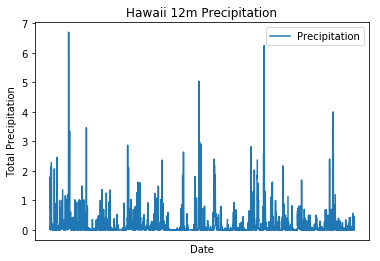

In [16]:
plt.plot(prcp_12m.prcp,label="Precipitation")
plt.xticks([],[])
plt.xlabel("Date")
plt.ylabel("Total Precipitation")
plt.legend(loc="best",prop={'size': 10})
plt.title("Hawaii 12m Precipitation")
plt.gca().invert_xaxis()
plt.savefig("Hawaii_12m_Precipitation.jpg")
plt.show()

In [17]:
#General Statistics
stats=prcp_12m.describe()
stats

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [18]:
#Total Stations
session.query(func.count(Stn.id)).all()

[(9)]

In [19]:
#Activity of each station
act=[Mmt.station,
     func.count(Mmt.date)]
total_activity=session.query(*act).\
    group_by(Mmt.station).\
    order_by(func.count(Mmt.date).desc()).all()
total_activity

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [20]:
most_active=total_activity[0][0]
most_active

'USC00519281'

In [21]:
stats_stations=[Mmt.station,func.min(Mmt.tobs),
           func.max(Mmt.tobs),
           func.avg(Mmt.tobs)]
stats_ma_active=session.query(*stats_stations).\
    filter(Mmt.station==most_active).all()

stats_ma_active

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

In [22]:
Most_active_info=session.query(Mmt.id,Mmt.station,Mmt.date,Mmt.prcp,Mmt.tobs).\
    filter(Mmt.station==most_active).\
    filter(Mmt.date>"2016-08-22").\
    order_by(Mmt.date.desc()).all()

df_ma = pd.DataFrame(Most_active_info,columns=["id","station","date","prcp","tobs"])#.dropna()
tobs_ma=df_ma.loc[:,["station","tobs"]]
tobs_ma.head()

,station,tobs
0,USC00519281,79.0
1,USC00519281,76.0
2,USC00519281,76.0
3,USC00519281,77.0
4,USC00519281,77.0


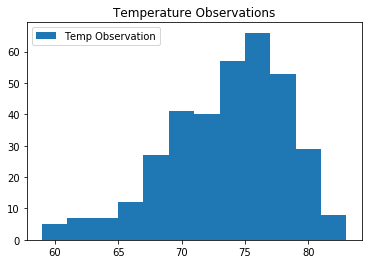

In [23]:
plt.hist(tobs_ma.tobs,bins=12,label="Temp Observation")
plt.title("Temperature Observations")
plt.legend()
plt.savefig("Hawaii_12m_Temperatures_Obs.jpg")
plt.show()